In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
#Tensorboard Things

%load_ext tensorboard
import tensorflow as tf
import datetime, os


In [ ]:
#Importing Image Dataset

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='sipakmedbinary.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('sipakmedbinary.zip')

In [ ]:
!unzip sipakmedbinary.zip

Archive:  sipakmedbinary.zip
   creating: sipakmedbinary/
   creating: sipakmedbinary/Abnormal/
  inflating: sipakmedbinary/Abnormal/001_01.bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (1).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (10).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (100).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (101).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (102).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (103).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (104).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (105).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (106).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (107).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (108).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (109).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (11).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o (110).bmp  
  inflating: sipakmedbinary/Abnormal/001_01_o 

In [ ]:
#For the distribution of the dataset
import os
import numpy as np
import glob
import shutil
class DatasetDivision:
	def __init__(self, root_dir="",output_dir=""):
		self.root_dir = root_dir
		self.output_dir = output_dir
		print("Instance of the class created")
	def printnow(self, new_dir):
		print("Just testing that the method calling is working"+new_dir)
	def divide_dataset(self, root_dir,output_dir):
		self.root_dir =root_dir
		self.output_dir = output_dir
		if os.path.exists(self.output_dir):
			if not os.path.exists(os.path.join(self.output_dir,'train')):
				os.mkdir(os.path.join(self.output_dir,'train')) 
				os.mkdir(os.path.join(self.output_dir,'val')) 
				os.mkdir(os.path.join(self.output_dir,'test')) 
		else:
			os.mkdir(self.output_dir)
			os.mkdir(os.path.join(self.output_dir,'train')) 
			os.mkdir(os.path.join(self.output_dir, 'val')) 
			os.mkdir(os.path.join(self.output_dir, 'test'))
		# Split train/val/test sets
		for file in os.listdir(root_dir):            
			classes_path = os.path.join(root_dir, file)  
			class_files = [name for name in glob.glob(os.path.join(classes_path,'*.bmp'))] 
			train_and_valid, test = train_test_split(class_files, test_size=0.20, random_state=42)  #Test data size will be 20%
			train, val = train_test_split(train_and_valid, test_size=0.25, random_state=42)  #Validation data size will be 20% and leaving 60% of data for training #

			#creating the training, validation and testing directories where the data will be moved.
			train_dir = os.path.join(self.output_dir, 'train',file) #creates the train data path for Divided_Dataset 
			val_dir = os.path.join(self.output_dir, 'val', file) #creates the validation data path for Divided_Dataset 
			test_dir = os.path.join(self.output_dir, 'test',file) #creates the test data path for Divided_Dataset 
			if not os.path.exists(train_dir):
				os.mkdir(train_dir)
			if not os.path.exists(val_dir):
				os.mkdir(val_dir)
			if not os.path.exists(test_dir):
				os.mkdir(test_dir)

			for frame_folders in train:
				#get only the last directory of the path frame_folders
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,train_dir)
			for frame_folders in val:
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,val_dir)
			for frame_folders in test:
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,test_dir)
			print('Dataset Division finished.')

In [ ]:
path_dir= "/content/sipakmedbinary/"
output_dir = "/content/sipakmedFormat"
datasetdiv1 = DatasetDivision(path_dir,output_dir)
datasetdiv1.printnow("The new guy")
datasetdiv1.divide_dataset(path_dir, output_dir)

Instance of the class created
Just testing that the method calling is workingThe new guy
Dataset Division finished.
Dataset Division finished.


['Abnormal', 'Normal']


(2, 2)

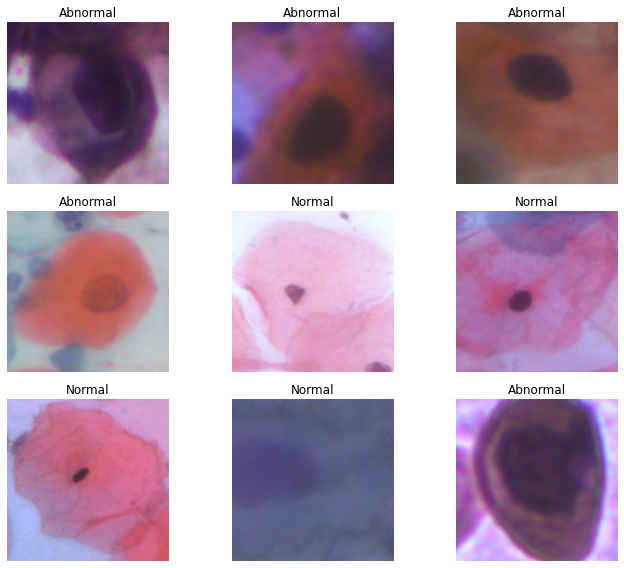

In [ ]:
from fastai.vision import *
batch_size = 10
path_img = output_dir
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train',
            valid='val', ds_tfms=get_transforms(), size = 224, bs=batch_size)#, check_ext=False)
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(10,8))
print(data.classes)
len(data.classes),data.c

In [ ]:

!pip install python 3.3

In [ ]:
pip install git+https://github.com/aleju/imgaug.git

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-g3wjwabq
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-g3wjwabq
  Created wheel for imgaug: filename=imgaug-0.4.0-cp36-none-any.whl size=971107 sha256=acf8d8f690d1876f9fb2b1f9177cc95c5dbe85ce0f235921d16d1e2a76be4c3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8giscmru/wheels/65/3d/94/ee32cbeaa29c473a4db74c2d21904ac747311fdca4732665f0
Successfully built imgaug
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
#Creating a class for data augmentation
import  cv2
import imgaug
import imageio
import os
import numpy as np
from imgaug import augmenters as iaa


class DataAugmentation:


	def __init__(self, root_dir="",output_dir=""):
		self.root_dir = root_dir
		self.output_dir = output_dir
		print("Instance of the DataAugmentation class created")


	def augmentation_of_image(self, test_image, output_path):
		self.test_image = test_image;
		self.output_path = output_path;
		#define the Augmenters



		#properties: A range of values signifies that one of these numbers is randmoly chosen for every augmentation for every batch

		# Apply affine transformations to each image.
		rotate = iaa.Affine(rotate=(-90,90));  
		scale = iaa.Affine(scale={"x": (0.5, 0.9), "y": (0.5,0.9)}); 
		translation = iaa.Affine(translate_percent={"x": (-0.15, 0.15), "y": (-0.15, 0.15)});
		shear = iaa.Affine(shear=(-2, 2)); 
		zoom = iaa.PerspectiveTransform(scale=(0.01, 0.15), keep_size=True) 
		h_flip = iaa.Fliplr(1.0); 
		v_flip = iaa.Flipud(1.0); 
		padding=iaa.KeepSizeByResize(iaa.CropAndPad(percent=(0.05, 0.25)))


		#More augmentations
		blur = iaa.GaussianBlur(sigma=(0, 1.22)) 
		contrast = iaa.contrast.LinearContrast((0.75, 1.5)); 
		contrast_channels = iaa.LinearContrast((0.75, 1.5), per_channel=True) 
		sharpen = iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5));
		gauss_noise = iaa.AdditiveGaussianNoise(scale=0.111*255, per_channel=True) 
		laplace_noise = iaa.AdditiveLaplaceNoise(scale=(0, 0.111*255)) 


		#Brightness 
		brightness = iaa.Multiply((0.35,1.65)) 
		brightness_channels = iaa.Multiply((0.5, 1.5), per_channel=0.75) 

		#CHANNELS (RGB)=(Red,Green,Blue)
		red =iaa.WithChannels(0, iaa.Add((10, 100))) 
		red_rot = iaa.WithChannels(0,iaa.Affine(rotate=(0, 45))) 
		green= iaa.WithChannels(1, iaa.Add((10, 100)))
		green_rot=iaa.WithChannels(1,iaa.Affine(rotate=(0, 45))) 
		blue=iaa.WithChannels(2, iaa.Add((10, 100)))
		blue_rot=iaa.WithChannels(2,iaa.Affine(rotate=(0, 45))) 

		#colors
		channel_shuffle =iaa.ChannelShuffle(1.0); #shuffle all images of the batch
		grayscale = iaa.Grayscale(1.0)
		hue_n_saturation = iaa.MultiplyHueAndSaturation((0.5, 1.5), per_channel=True) #change hue and saturation with this range of values for different values 
		add_hue_saturation = iaa.AddToHueAndSaturation((-50, 50), per_channel=True) #add more hue and saturation to its pixels
		#Quantize colors using k-Means clustering
		kmeans_color = iaa.KMeansColorQuantization(n_colors=(4, 16)) #quantizes to k means 4 to 16 colors (randomly chosen). Quantizes colors up to 16 colors

		#Alpha Blending 
		blend =iaa.AlphaElementwise((0, 1.0), iaa.Grayscale((0,1.0))) ; #blend depending on which value is greater

		#Contrast augmentors
		clahe = iaa.CLAHE(tile_grid_size_px=((3, 21),[0,2,3,4,5,6,7])) #create a clahe contrast augmentor H=(3,21) and W=(0,7)
		histogram = iaa.HistogramEqualization() #performs histogram equalization

		#Augmentation list of metadata augmentors
		OneofRed = iaa.OneOf( [red]);
		OneofGreen = iaa.OneOf( [green] );
		OneofBlue = iaa.OneOf( [blue]);
		contrast_n_shit = iaa.OneOf([contrast, brightness, brightness_channels]);
		SomeAug = iaa.SomeOf(2,[rotate,scale, translation, shear, h_flip,v_flip],random_order=True);
		SomeClahe = iaa.SomeOf(2, [clahe, iaa.CLAHE(clip_limit=(1, 10)),iaa.CLAHE(tile_grid_size_px=(3, 21)),iaa.GammaContrast((0.5, 2.0)), iaa.AllChannelsCLAHE() , iaa.AllChannelsCLAHE(clip_limit=(1, 10), per_channel=True)],random_order=True) #Random selection from clahe augmentors
		edgedetection= iaa.OneOf([iaa.EdgeDetect(alpha=(0, 0.7)),iaa.DirectedEdgeDetect(alpha=(0, 0.7), direction=(0.0, 1.0))]);# Search in some images either for all edges or for directed edges.These edges are then marked in a black and white image and overlayed with the original image using an alpha of 0 to 0.7.
		canny_filter = iaa.OneOf([iaa.Canny(), iaa.Canny(alpha=(0.5, 1.0), sobel_kernel_size=[3, 7])]); #choose one of the 2 canny filter options
		OneofNoise = iaa.OneOf([blur, gauss_noise, laplace_noise])
		Color_1 = iaa.OneOf([channel_shuffle,grayscale, hue_n_saturation , add_hue_saturation, kmeans_color]);
		Color_2 = iaa.OneOf([channel_shuffle,grayscale, hue_n_saturation , add_hue_saturation, kmeans_color]);
		Flip = iaa.OneOf([histogram , v_flip, h_flip]);

		#Define the augmentors used in the DA
		Augmentors= [SomeAug, SomeClahe, edgedetection, canny_filter, Color_1, contrast_n_shit]


		for i in range(0,6):
			img = cv2.imread(test_image) #read you image
			images = np.array([img for _ in range(6)], dtype=np.uint8)  # 6 is the size of the array that will hold 6 different images
			images_aug = Augmentors[i].augment_images(images)  
			cv2.imwrite(os.path.join(output_path,test_image +"new"+str(i)+'.jpg'), images_aug[i]) 

In [ ]:
import imgaug; print(imgaug.__file__)

In [ ]:
import shutil

class DataAugmentation_Extension:
	def __init__(self, directory=""):
		self.directory = directory
		print("Instance of DataAugmentation_Extension class created")

	def printnow(self, dir):
		print("Just testing that the method calling is working "+ dir)


	def extend_dataset(self,directory):
		#Create an instance of class 
		print("HEY")
		library_augment= DataAugmentation();
		self.directory = directory 
		if not os.path.exists(self.directory):
			print("ERROR! Couldn't find directory!")
		else:
			print("Directory exists")
		for file in os.listdir(directory):            #for any file inside the root directory 
			classes_path = os.path.join(directory, file)  #So for every folder class we create a class directory
			class_files = [name for name in glob.glob(os.path.join(classes_path,'*.bmp'))]  #alternatively we can use the globe as mentioned
			print(class_files); #call augmentation for all class_files
			for i in range(len(class_files)):
				library_augment.augmentation_of_image(class_files[i], classes_path)

In [ ]:
print(dir(iaa))

In [ ]:
print(imgaug.__version__)

In [ ]:
import imgaug
print(imgaug.__file__)

In [ ]:
print(imgaug.__version__)

In [ ]:
#data augmentation
#directories
target_directory = "/content/sipakmedFormat/train"
#create an instance of the class
datasetda = DataAugmentation_Extension()
datasetda.extend_dataset(target_directory)

Instance of DataAugmentation_Extension class created
HEY
Instance of the DataAugmentation class created
Directory exists
['/content/sipakmedFormat/train/Normal/062_10.bmp', '/content/sipakmedFormat/train/Normal/1_01 (423).bmp', '/content/sipakmedFormat/train/Normal/010_11.bmp', '/content/sipakmedFormat/train/Normal/1_01 (213).bmp', '/content/sipakmedFormat/train/Normal/1_01 (114).bmp', '/content/sipakmedFormat/train/Normal/1_01 (73).bmp', '/content/sipakmedFormat/train/Normal/042_12.bmp', '/content/sipakmedFormat/train/Normal/104_04.bmp', '/content/sipakmedFormat/train/Normal/113_05.bmp', '/content/sipakmedFormat/train/Normal/1_01 (396).bmp', '/content/sipakmedFormat/train/Normal/1_01 (62).bmp', '/content/sipakmedFormat/train/Normal/082_05.bmp', '/content/sipakmedFormat/train/Normal/043_06.bmp', '/content/sipakmedFormat/train/Normal/093_22.bmp', '/content/sipakmedFormat/train/Normal/080_07.bmp', '/content/sipakmedFormat/train/Normal/014_04.bmp', '/content/sipakmedFormat/train/Normal/12

In [ ]:
import numpy as np
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.applications import ResNet50, VGG16
from keras.models import Model, Sequential

base_model = ResNet50(weights='imagenet', include_top=False)
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

In [ ]:
### MODELS
import numpy as np
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.applications import ResNet50, VGG16
from keras.models import Model, Sequential


"""
Create a new feature extractor based on the pretrained ResNet50 model:
The model is frozen from the bottom layer to activation layer 86. 
Activation layer 86 is then pooled with GlobalMaxPool2D, connected to a 
Dense layer with 1024 neurons, and then to the softmax layer.
"""
def R50(seed = None):
    np.random.seed(seed)
    base_model = ResNet50(weights="imagenet", include_top=False)
    for layer in base_model.layers[:86]:
        layer.trainable = False
    for layer in base_model.layers[86:]:
        layer.trainable = True
    x = (base_model.get_layer("conv4_block1_0_conv")).output
    mx = GlobalMaxPool2D()(x)
    x = BatchNormalization()(mx)
    x = Dropout(.5)(x)
    x = Dense(1024, activation='relu', name="dense_1024")(x)
    x = BatchNormalization()(x)
    x = Dropout(.5)(x)
    preds = Dense(2,activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=preds)
    return model


In [ ]:
import numpy as np
from keras.layers import Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




"""LOAD DATA"""
# path to folder with data
path = "/content/sipakmedFormat/"
# specify image data generator with data augmentation (train_datagen) resp. without (no_DA_IDG)
train_datagen = ImageDataGenerator(featurewise_center=False,
                                   rotation_range = 5, fill_mode="nearest",
                                   zoom_range=[1/1.0, 1/1.0], width_shift_range=0.0, height_shift_range=0.0,
                                   horizontal_flip = True, vertical_flip=True,
                                   brightness_range=[0.5, 1.3], channel_shift_range=20)

no_DA_IDG = ImageDataGenerator()

# in training set: use data augmentation image data generator, for validation and test: no data augmentation.
training_set = train_datagen.flow_from_directory(path+"train/",
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='categorical', shuffle=True)



validation_set = no_DA_IDG.flow_from_directory(path+"val/",
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                shuffle=True)



test_set_V2 = no_DA_IDG.flow_from_directory(path+"test/",
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=1,
                                                class_mode='categorical',
                                                shuffle=False)

###############################################################################################
"""CREATE & TRAIN MODELS"""

model_r50 = R50()

epochs = 50
opt = Adam(learning_rate=1e-3)
model_r50.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
model_r50.fit_generator(generator=training_set, epochs=epochs, validation_data=validation_set, verbose=2)

opt = Adam(learning_rate=1e-5)
model_r50.fit_generator(generator=training_set, epochs=epochs, validation_data=validation_set, verbose=2)
# save model weights
model_r50.save_weights("K_R50_sipakmed_Tri.h5")

"""EVALUATE PERFORMANCE ON THE TEST SET"""

y_test = test_set_V2.classes
pred = np.argmax(model_r50.predict_generator(test_set_V2, steps = test_set_V2.n), axis=1)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


Found 13664 images belonging to 2 classes.
Found 652 images belonging to 2 classes.
Found 652 images belonging to 2 classes.
94773248/94765736 [==============================] - 1s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
427/427 - 190s - loss: 0.3484 - acc: 0.8855 - val_loss: 0.0903 - val_acc: 0.9632
Epoch 2/50
427/427 - 190s - loss: 0.2088 - acc: 0.9199 - val_loss: 0.1046 - val_acc: 0.9632
Epoch 3/50
427/427 - 191s - loss: 0.1739 - acc: 0.9324 - val_loss: 0.0434 - val_acc: 0.9877
Epoch 4/50
427/427 - 184s - loss: 0.1538 - acc: 0.9410 - val_loss: 0.0465 - val_acc: 0.9816
Epoch 5/50
427/427 - 182s - loss: 0.1451 - acc: 0.9451 - val_loss: 0.0535 - val_acc: 0.9847
Epoch 6/50
427/427 - 181s - loss: 0.1474 - acc: 0.9445 - val_loss: 0.0353 - val_acc: 0.9908
Epoch 7/50
427/427 - 182s - loss: 0.1362 - acc: 0.9476 - val_loss: 0.0385 - val_acc: 0.9847
Epoch 8/50
427/427 - 180s - loss: 0.1345 - acc: 0.9496 - val_loss: 0.0357 - val_acc: 0.987

In [ ]:
model_r50.save("model_R50_sipakmed_tri.h5")

In [ ]:
from google.colab import files
files.download("/content/model_R50_sipakmed_tri.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>